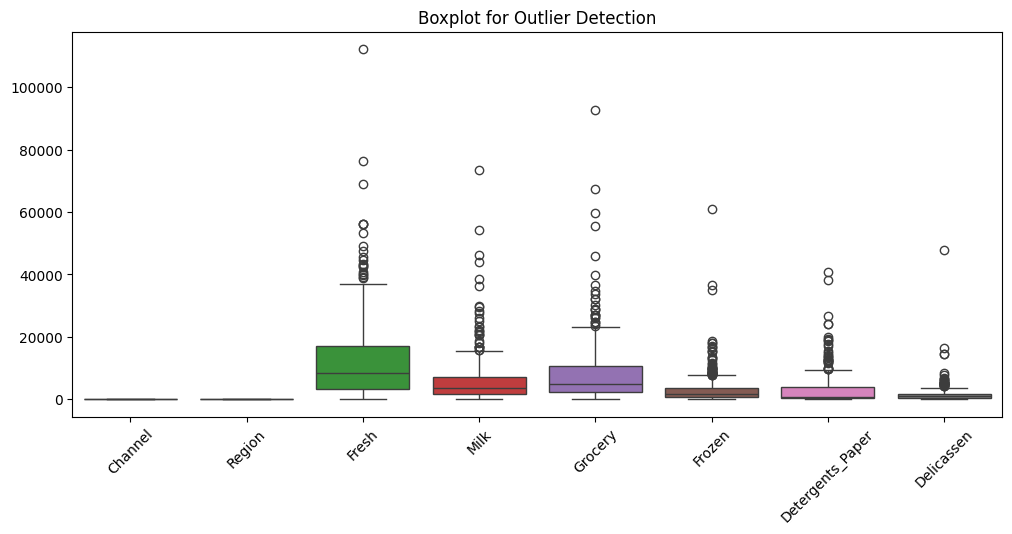

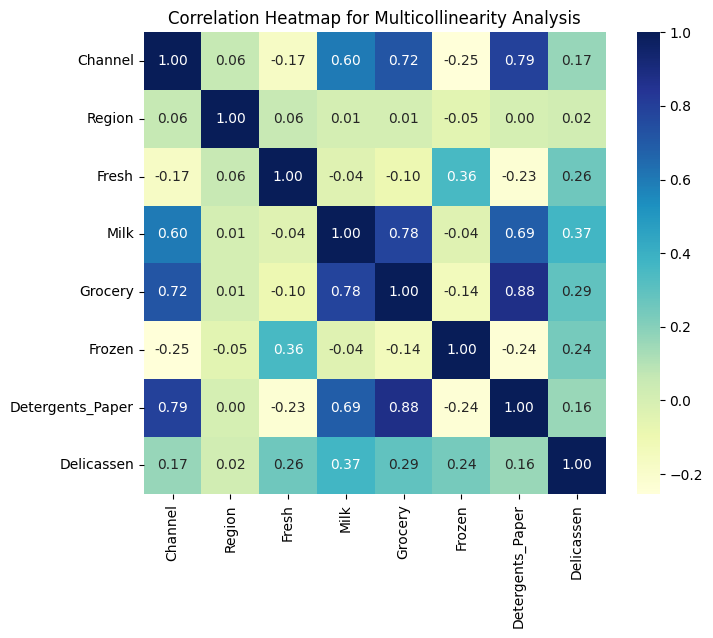

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# 1. LOAD AND PREPARE DATASET
# ==============================

# Load dataset
df = pd.read_csv("ML470_S8_Wholesale Customers data_Practice.csv")

# Select only numeric columns
df_num = df.select_dtypes(include="number")

# Round values for clean visualization
df_num = df_num.round(2)

# ==============================
# 2. OUTLIER ASSESSMENT
# ==============================

def plot_outlier_boxplot(data):
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=data)
    plt.title("Boxplot for Outlier Detection")
    plt.xticks(rotation=45)
    plt.show()


# Plot boxplot before outlier treatment
plot_outlier_boxplot(df_num)

# ==============================
# 3. OUTLIER TREATMENT (IQR CAPPING)
# ==============================

def iqr_capping(data):
    capped = data.copy()

    for col in capped.columns:
        Q1 = capped[col].quantile(0.25)
        Q3 = capped[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        capped[col] = np.where(
            capped[col] < lower, lower,
            np.where(capped[col] > upper, upper, capped[col])
        )

    return capped.round(2)


df_capped = iqr_capping(df_num)

# ==============================
# 4. MULTICOLLINEARITY VISUALIZATION
# ==============================

def plot_correlation_heatmap(data):
    corr = data.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr,
        annot=True,
        cmap="YlGnBu",
        fmt=".2f",
        square=True,
        cbar=True
    )
    plt.title("Correlation Heatmap for Multicollinearity Analysis")
    plt.show()

plot_correlation_heatmap(df_capped)
